# Practice - Tensorflow Datasets - SOLUTION


<h1>Tensorflow Datasets (Practice)</h1>
<ul><li>For this assignment, you will be working with the Dangerous Farm Insects data set from Kaggle: <a href="https://www.kaggle.com/datasets/tarundalal/dangerous-insects-dataset">https://www.kaggle.com/datasets/tarundalal/dangerous-insects-dataset</a></li></ul>
<p>The dataset has images of 15 different types of dangerous insects. <br><em>Note: Due to the larger number of classes in the dataset (15), the accuracy for your baseline model is going to be fairly low (&lt;50%).</em></p><p><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1692317485__Screenshot20230817at81117PM.png" style="color: rgb(51, 51, 51);"></p>
<h2>Getting Started</h2>
<ul><li>Create a new GitHub repository for this assignment.</li><li>Extract the downloaded data into a folder in your repository. </li><li>Start a new Jupyter notebook for this assignment.</li></ul>
<h2>Create a Tensorflor Image Dataset</h2>
<ul><li><strong>Create a Dataset using the tf.keras.image_dataset_from_directory function, using the following parameters:</strong><ul><li>label_model='categorical'</li><li>image_width=128 </li><li>image_height = 128</li><li>batch_size=32</li><li>a random seed</li></ul></li></ul>
<ul><li><strong>Save the class_names and number of classes as variables to reuse later.</strong> </li><li><strong>Create a class_dict that has integers as the keys with the corresponding class names (sorted alphabetically)</strong><br>
</li><li><strong>Split the dataset into a 70% training, 20 % validation, and 10% test split.</strong><ul><li>Hint: use .take() and .skip()</li></ul></li></ul>
<h2>Optimize the Dataset</h2>
<ul><li><strong>Add a shuffle step to the training dataset.</strong></li><li><strong>Add caching and prefetching to all 3 datasets</strong><ul><li>Note: if you have hardware issues using caching and prefetching<strong>, you may skip this requirement.</strong></li></ul></li></ul>
<h2>Preview the Data and Save the Shape</h2>
<ul><li><strong>Retrieve a batch of training data and save the first image's shape to use in your model's input_shape.</strong></li><li><strong>Display an example image. </strong></li><li><strong>Display an example label.</strong></li></ul>
<p><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 18px; font-weight: 700;">Build a Simple CNN Model</span><br></p>
<ul><li><strong>Build a simple Convolutional Neural Network with:</strong><ul><li>1) a Rescaling layer</li><li>2) Conv2D layer with:<ul><li>16 filters</li><li>Kernel size = 3</li><li>padding='same'</li></ul></li><li>3)  MaxPooling Layer with:<ul><li>pool_size=2</li></ul></li><li>4) Conv2D layer with:<ul><li>32 filters</li><li>Kernel size = 3</li><li>padding='same'</li></ul></li></ul><ul><li>5) MaxPooling Layer with:<ul><li>pool_size=2</li></ul></li><li>6) a flattening layer</li><li>7) final Dense layer with appropriate settings (for the task):<ul><li> the correct number of units </li><li>and activation function </li></ul></li><li>8) Compile the model with:<ul><li>The appropriate loss function</li><li>optimizer='adam' (or use the class: tf.keras.optimizers.Adam())</li><li>metrics=['accuracy']</li><li>loss = "categorical_crossentropy" (or use the class: tf.keras.losses.CategoricalCrossentropy())</li></ul></li></ul></li></ul>
<figure><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1692318050__practicedatasetscnn.png" style="width: 486px; height: 336px;" width="486" height="336"></figure>
<h2>Fit the Model </h2>
<ul><li>Fit the model using:<ul><li>the training ds as the training data, </li></ul><ul><li>Use the validation ds as the validation_data</li><li>10 epochs</li></ul></li><li>Save the model.fit()'s history </li></ul>
<h2>Evaluate the Model</h2>
<p><em>Reminder: Due to the larger number of classes in the dataset (15), the accuracy for your baseline model is going to be fairly low (&lt;50%).</em></p>
<ul><li>Plot the model's training history.</li><li>Evaluate the model on  the training and test data, including:<ul><li>Scikit-learn confusion matrix </li><li>Scikit-learn classification report</li><li>The results from model.evaluate method.</li><li><em>(Tip: use your custom flexible evaluation functions.)</em></li></ul></li></ul>
<p><br></p>
<h2><a href="https://github.com/coding-dojo-data-science/intermediate-ml-practice-solutions/blob/main/04-ComputerVision/Tensorflow-Datasets-Practice-SOLUTION.ipynb" target="_blank">Solution Notebook</a></h2>

# SOLUTION CODE

In [1]:
import numpy as np
import tensorflow as tf

# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

import os, glob
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
tf.__version__

# Custom functions: add to lesson notebook instead of file
%load_ext autoreload
%autoreload 2


import sys, os
sys.path.append(os.path.abspath("../Functions/"))

import ann_functions as af

### Create a Tensorflow Image Dataset

In [2]:
# Checking the contents of xrays folder
data_dir = "Data/Dangerous Insects/farm_insects/"
data_dir

'Data/Dangerous Insects/farm_insects/'

In [3]:
# Getting list of img file paths (ONLY, did not make recursuve so no folders)
img_files = glob.glob(data_dir+"**/*")#, recursive=True)
len(img_files)

1591

In [4]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape

(1250, 1000, 3)

In [5]:
# Saving image params as vars for reuse
batch_size = 32
img_height = 128
img_width = 128

In [6]:
# make the dataset from the main folder of images
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

ds

Found 1591 files belonging to 15 classes.
Metal device set to: Apple M1 Pro


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [7]:
len(ds)

50

In [8]:
## Set the size of the 
split_train = 0.7
split_val = 0.2
split_test = 0.1

# Calculate the number of batches for training and validation data 
n_train_batches =  int(len(ds) * split_train)
n_val_batches = int(len(ds) * split_val)

print(f"Use {n_train_batches} batches as training data")
print(f"Use {n_val_batches} batches as validation data")
print(f"The remaining {len(ds)- (n_train_batches+n_val_batches)} batches will be used as test data.")

Use 35 batches as training data
Use 10 batches as validation data
The remaining 5 batches will be used as test data.


In [9]:
# Use .take to slice out the number of batches 
train_ds = ds.take(n_train_batches)
len(train_ds)

35

In [10]:
## Create the val_ds from original ds

# 1. Skipping over the training batches
val_ds = ds.skip(n_train_batches)

# 2. Taking the correct number of validation batches
val_ds = val_ds.take(n_val_batches)
len(val_ds)

10

In [11]:
# Create the test split from ds

# SKip over all of the training + val images
test_ds = ds.skip(n_train_batches + n_val_batches)
len(test_ds)

5

In [12]:
# Determine number of batches in dataset
ds_size = len(ds)
ds_size

50

### Preview the Data

In [13]:
# checking the class names
class_names = ds.class_names

class_dict = dict(zip(range(len(class_names)), class_names))
class_dict

{0: 'Africanized Honey Bees (Killer Bees)',
 1: 'Aphids',
 2: 'Armyworms',
 3: 'Brown Marmorated Stink Bugs',
 4: 'Cabbage Loopers',
 5: 'Citrus Canker',
 6: 'Colorado Potato Beetles',
 7: 'Corn Borers',
 8: 'Corn Earworms',
 9: 'Fall Armyworms',
 10: 'Fruit Flies',
 11: 'Spider Mites',
 12: 'Thrips',
 13: 'Tomato Hornworms',
 14: 'Western Corn Rootworms'}

In [14]:
# Saving # of classes for reuse
num_classes = len(class_names)
num_classes

15

In [15]:
# Batch Size
batch_size

32

In [16]:
# taking a sample banch to see batch shape
example_batch_imgs,example_batch_y= train_ds.take(1).get_single_element()
example_batch_imgs.shape

2023-08-24 17:49:58.377191: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


TensorShape([32, 128, 128, 3])

In [17]:
# individual image shape
# individual image shape
input_shape = example_batch_imgs[0].shape
input_shape

TensorShape([128, 128, 3])

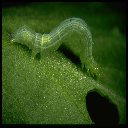

In [18]:
array_to_img(example_batch_imgs[0])

In [19]:
# Demo Unpacking shape
[*input_shape]

[128, 128, 3]

### Optimize Dataset Performance

In [20]:
# Use autotune to automatically determine best buffer sizes 
AUTOTUNE = tf.data.AUTOTUNE

# ORIGINAL SHUFFLED TRAIN
train_ds = train_ds.cache().shuffle(buffer_size= train_ds.cardinality(),
                                   seed=42).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Training Baseline CNN

In [21]:
def build_model1(name='CNN1',input_shape=input_shape):
    
    model = models.Sequential(name=name)
    # Using rescaling layer to scale pixel values
    model.add(layers.Rescaling(1./255, input_shape=input_shape))
    
    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=16,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding='same')) 
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling


    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=32,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding='same')) 
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling
    
    # Flattening layer
    model.add(layers.Flatten())
    # Output layer
    model.add(
        layers.Dense(len(class_names), activation="softmax")  # How many output possibilities we have
    )  # What activation function are you using?
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    model.summary()
    return model

### Model 1: Basline Model

In [22]:
# import visualkeras as vk
# model1 = build_model1(name='Model1')
# vk.layered_view(model1, legend=True, 
#                 draw_volume=False, 
#                 to_file='practice_datasets_cnn.png')

In [23]:
# Build fresh model and train
model1 = build_model1(name='Model1')

# fit the neural network
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10, )

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0    

In [24]:
# af.plot_history(history)
# model1.evaluate(test_ds, return_dict=True)

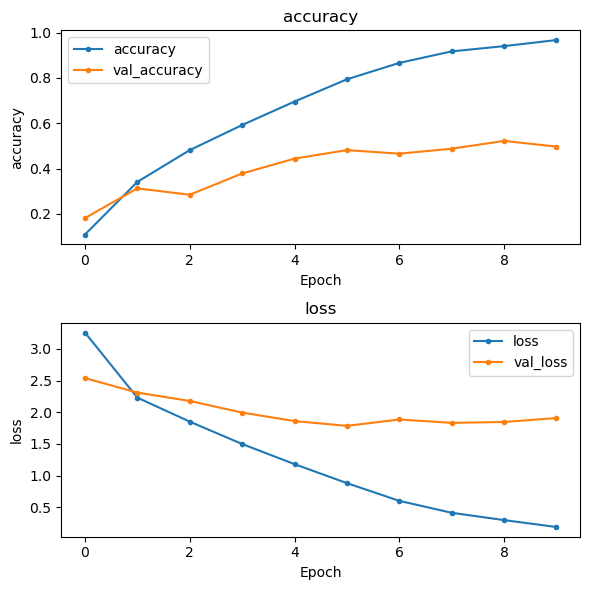


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        67
           2       0.90      0.90      0.90        73
           3       1.00      1.00      1.00        83
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00        78
           9       0.92      0.92      0.92        85
          10       1.00      0.99      0.99        72
          11       1.00      1.00      1.00        82
          12       0.97      1.00      0.99        75
          13       1.00      1.00    

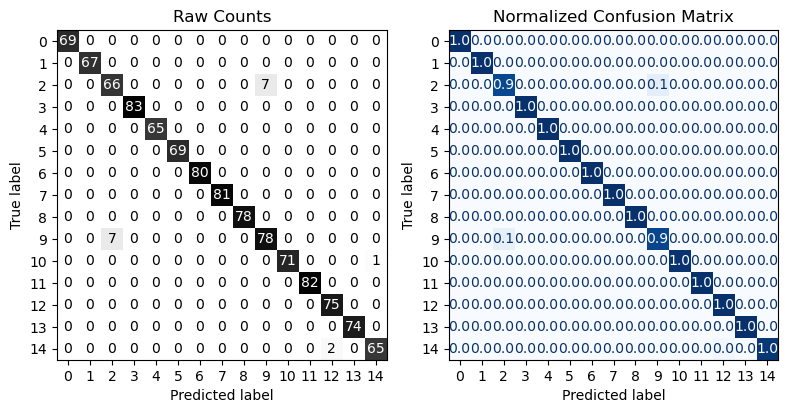


- Evaluating Training Data:
35/35 [==============================] - 0s 9ms/step - loss: 0.1188 - accuracy: 0.9848
{'loss': 0.11880552768707275, 'accuracy': 0.9848214387893677}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.20      0.25      0.22         8
           2       0.25      0.25      0.25         8
           3       0.44      0.44      0.44         9
           4       0.42      0.45      0.43        11
           5       0.80      0.57      0.67        14
           6       0.75      0.55      0.63        11
           7       0.17      0.20      0.18         5
           8       0.78      0.50      0.61        14
           9       0.38      0.43      0.40         7
          10       0.33      0.33      0.33       

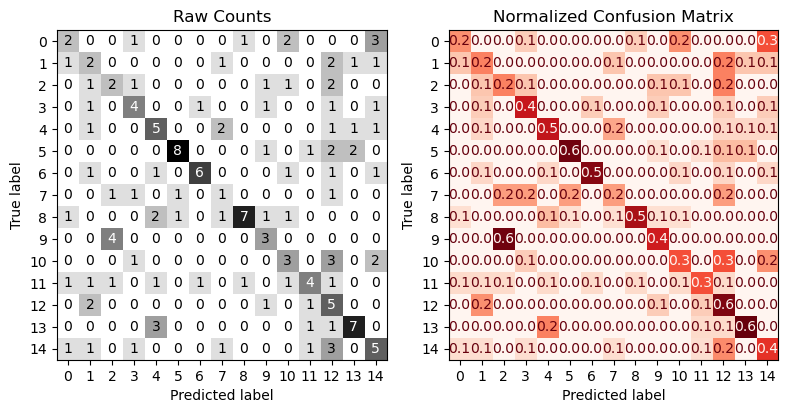


- Evaluating Test Data:
5/5 [==============================] - 0s 10ms/step - loss: 2.2711 - accuracy: 0.4238
{'loss': 2.271056652069092, 'accuracy': 0.42384105920791626}


In [26]:
# Use evaluation function
af.evaluate_classification_network(model1,X_train=train_ds,
                                   X_test=test_ds, history=history, figsize=(8,8),
                                  values_format=".1f");